In [1]:
import win32api as wapi
import os
import cv2
import numpy as np
import time
from PIL import ImageGrab

In [2]:
def show_img(image):
    while True:
        cv2.imshow('Image window',image)
        if cv2.waitKey(10) & 0XFF==ord('q'):
            cv2.destroyAllWindows()
            break

In [3]:
keylist="ABCDEFGHIJKLMNOPQRSTUVWXYZ"

def get_keys():
    output=[]
    for key in keylist:
        if wapi.GetAsyncKeyState(ord(key)):
            output.append(key)
            break
    return output

In [4]:
def onehotkey(key):
    if 'W' in key:
        return([1,0,0])
    if 'A' in key:
        return([0,1,0])
    if 'D' in key:
        return([0,0,1])
    else:
        return([])

In [33]:
def message_fun(num):
    last=time.time()
    message=np.ones((400,400))
    message=cv2.putText(message,str(num),(50,125),cv2.FONT_HERSHEY_DUPLEX,2,(0,0,255),2)
    while True:
        cv2.imshow('Message',message)
        if cv2.waitKey(10) & ((time.time()-last)>3.0):
            cv2.destroyAllWindows()
            break
    cv2.namedWindow('Data Generation Progressing')


In [34]:
file_name="training_data.npy"

if file_name in os.listdir('pics'):
    print("file found")
    training_data=np.load('pics/training_data.npy',allow_pickle=True)

else:
    print("file not found")
    training_data=[]



file found


In [35]:
training_data=training_data.tolist()

In [42]:
num=0
time.sleep(5)
cv2.namedWindow('Data Generation Progressing')
#image grab and show
while(True):
    num+=1
    screen=np.array(ImageGrab.grab(bbox=(0,40,800,600)))
    key=onehotkey(get_keys())
    if num%500==0:
        message_fun(num)
        print('training_data_build :'+str(num))
    screen=cv2.resize(screen,(80,56)) 
    screen=cv2.cvtColor(screen,cv2.COLOR_BGR2GRAY)
    if len(key)>0:
        list1=[screen,key]
        training_data.append(list1)
        np.save('pics/training_data.npy',training_data)
    if cv2.waitKey(25) & 0XFF==ord('q'):
        cv2.destroyAllWindows()
        break


training_data_build :500
training_data_build :1000
training_data_build :1500
training_data_build :2000
training_data_build :2500
training_data_build :3000


In [44]:
length_of_version=len(training_data)

file_name="versions.npy"
if file_name in os.listdir('pics'):
    print("file found")
    versions=np.load('pics/versions.npy',allow_pickle=True)
    versions=versions.tolist()

else:
    print("file not found")
    versions=[]
    
versions.append(length_of_version)
np.save('pics/versions.npy',versions)

file found


In [45]:
frame=np.load('pics/training_data.npy',allow_pickle=True)
print(len(frame))


8218


In [46]:
show_img(cv2.resize(frame[-1][0],(500,500)))
print(frame[250][1])

[1, 0, 0]


In [47]:
from matplotlib import pyplot as plt
from tqdm import tqdm
frame=np.load('pics/training_data.npy',allow_pickle=True)

In [48]:
w=0
a=0
d=0
for i in tqdm(range(len(frame))):
    if frame[i][1][0]==1:
        w+=1
    if frame[i][1][1]==1:
        a+=1
    if frame[i][1][2]==1:
        d+=1
        

100%|██████████████████████████████████████████████████████████████████████████| 8218/8218 [00:00<00:00, 746643.35it/s]


<BarContainer object of 3 artists>

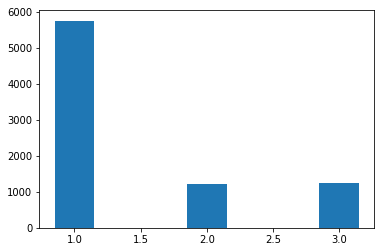

In [49]:
plt.bar([1,2,3],[w,a,d],0.3)

In [50]:
print(w,a,d)

5748 1226 1244


In [13]:
a=np.array([1,2,3])

In [16]:
a=a.tolist()

In [17]:
a.append(2)

In [18]:
print(a)

[1, 2, 3, 2]
